# 决策树可视化

## 1. 决策树构建【账号是否真实】

#### 1.1 构建数据

In [1]:
import numpy as np
import pandas as pd

y = np.array(list('NYYYYYNYYN')) # 表示目标值【是否真实用户】
print(y)

X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY')})
X # 表示特征数据

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N']


,日志密度,好友密度,真实头像
0,s,s,N
1,s,l,Y
2,l,m,Y
3,m,m,Y
4,l,m,Y
5,m,l,N
6,m,s,Y
7,l,m,Y
8,m,s,Y
9,s,s,Y


#### 1.2 模型训练

区分，用户，是否真实：**分类问题**

In [2]:
# 直接运动会报错：ValueError: could not convert string to float: 's'

In [3]:
# 区分，用户，是否真实：分类问题
from sklearn.tree import DecisionTreeClassifier # Class类，分类

# 算法，用法，都是相似的，统一的
model = DecisionTreeClassifier() # 第一次使用，KNN、LogisticRegression

model.fit(X,y)

ValueError: could not convert string to float: 's'

#### 1.3 数据转换【数据清洗】【特征工程】

In [4]:
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

,日志密度,好友密度,真实头像
0,0,0,0
1,0,2,1
2,2,1,1
3,1,1,1
4,2,1,1
5,1,2,0
6,1,0,1
7,2,1,1
8,1,0,1
9,0,0,1


#### 1.4 模型训练

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X,y)

DecisionTreeClassifier()

In [6]:
model.predict(X)

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N'], dtype='<U1')

In [7]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N'], dtype='<U1')

## 2. 模型可视化方法一

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

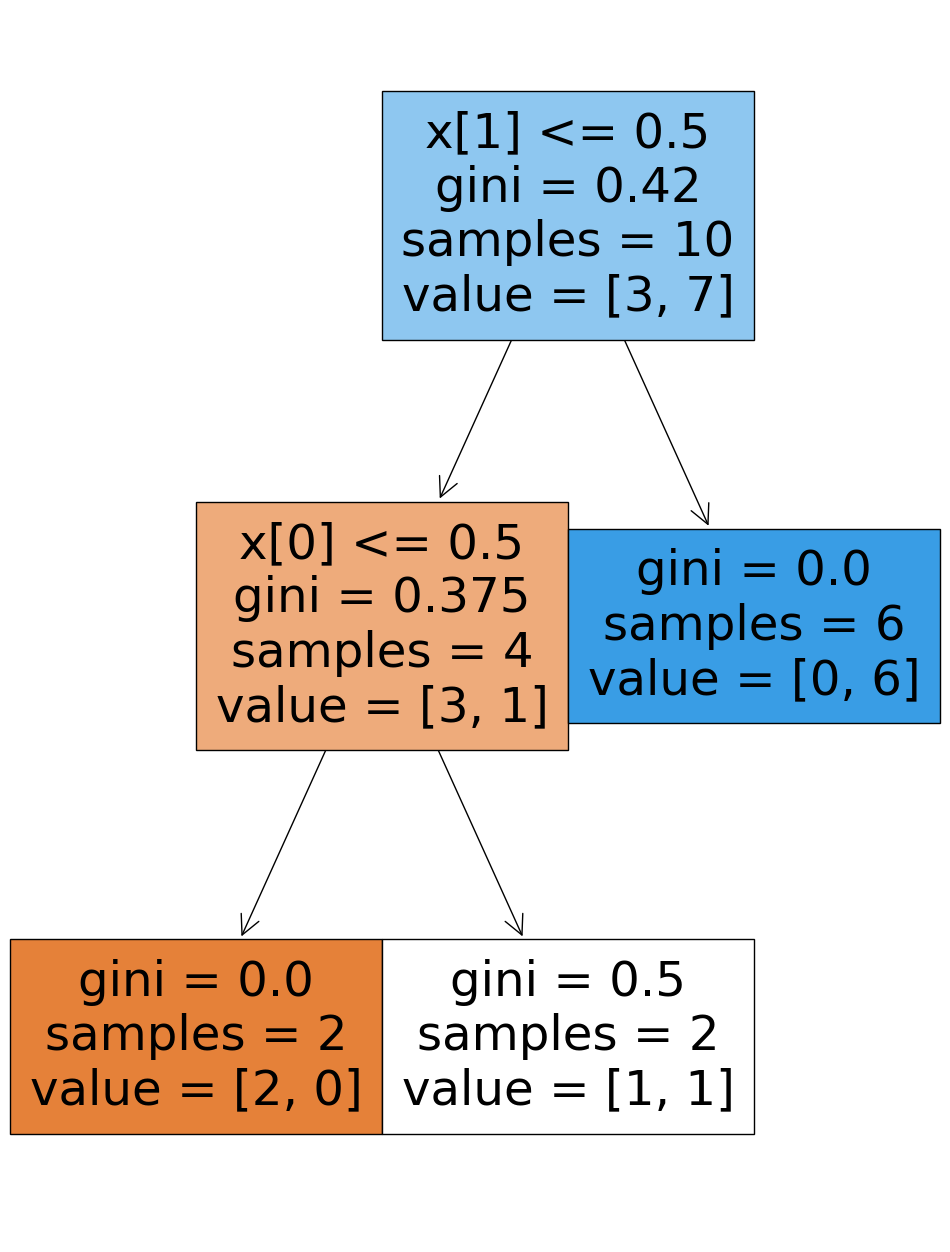

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,16))
tree.plot_tree(model,filled=True)  # filled=True 颜色填充

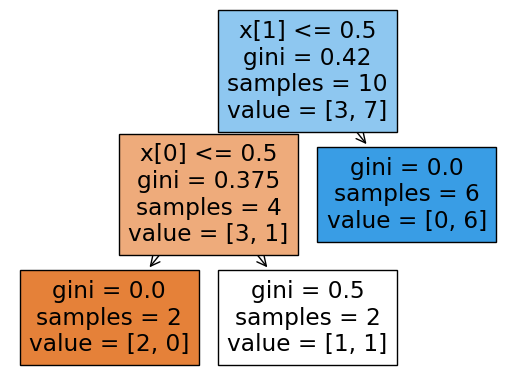

In [9]:
# 赋值接收一下，就不会有文本输出了
_ = tree.plot_tree(model,filled=True)  # filled=True 颜色填充

In [10]:
from matplotlib import font_manager

fm = font_manager.FontManager()
[font.name for font in fm.ttflist]   # 查看可用字体

['DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmex10',
 'STIXGeneral',
 'cmsy10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmmi10',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'cmss10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'Gurmukhi MN',
 'Mishafi Gold',
 'Noto Sans Tifinagh',
 'STIXIntegralsUpD',
 'Zapfino',
 'Source Code Pro',
 'Wingdings',
 'Ubuntu Mono',
 'Futura',
 'Noto Sans Canadian Aboriginal',
 'Mishafi',
 '.SF Hebrew Rounded',
 'STIXGeneral',
 'Trebuchet MS',
 'Apple Symbols',
 'Microsoft Sans Serif',
 'Gujarati MT',
 'Source Code Pro',
 'Helvetica

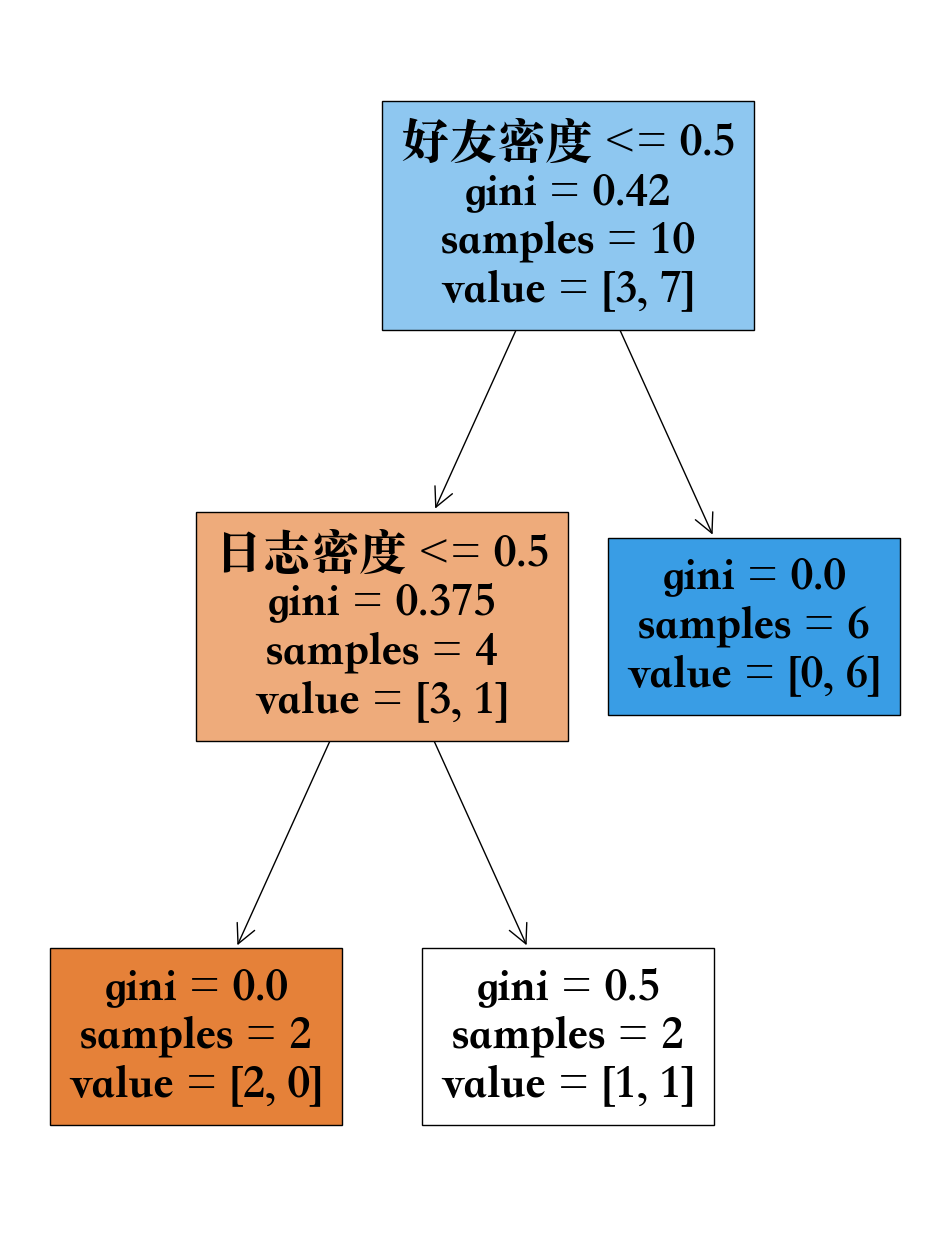

In [11]:
plt.figure(figsize=(12,16))
plt.rcParams['font.family'] = 'Songti SC'
_ = tree.plot_tree(model,filled=True,feature_names=['日志密度','好友密度','真实头像'])

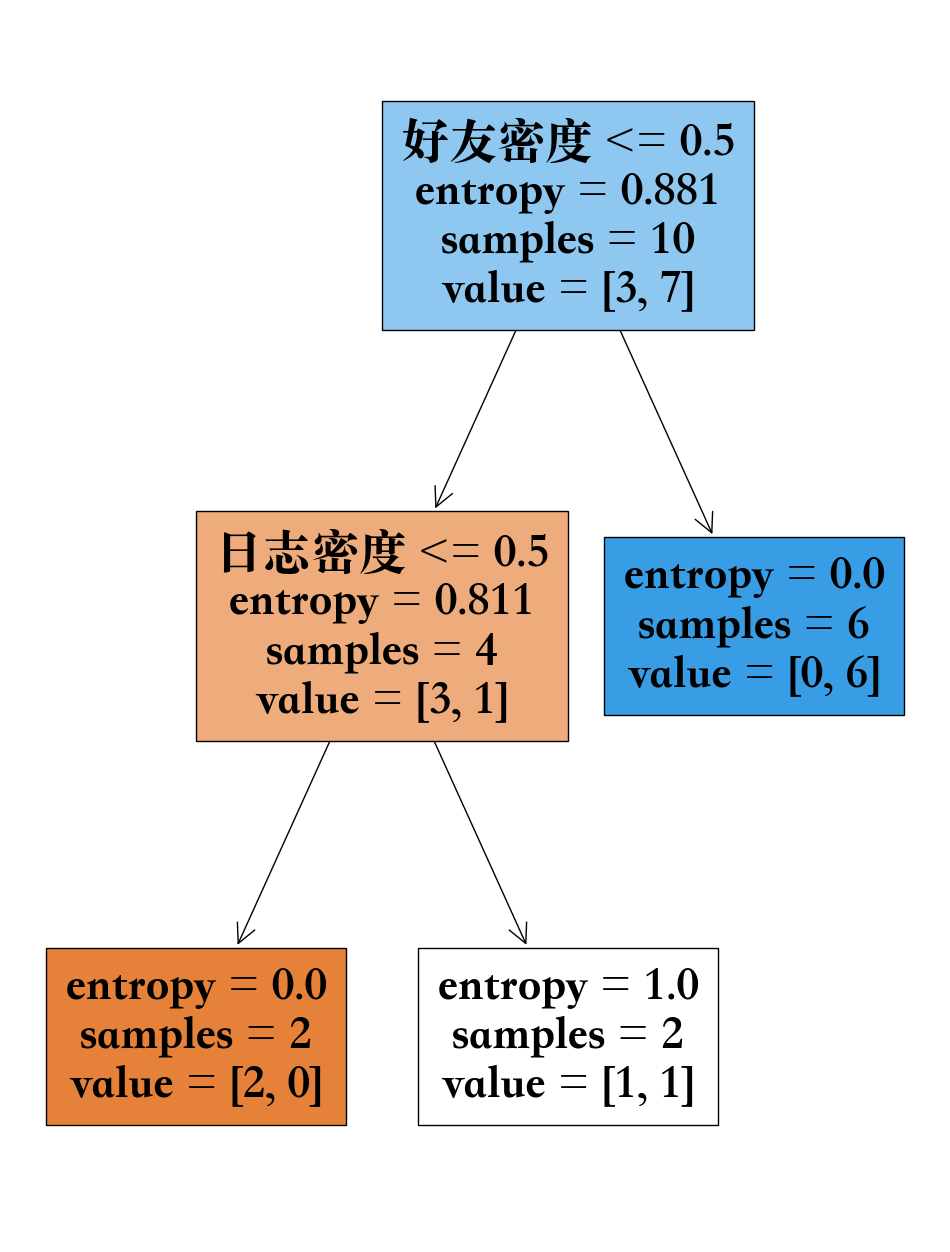

In [12]:
# 使用信息熵，作为分裂标准
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

plt.rcParams['font.family'] = 'Songti SC'
plt.figure(figsize=(12,16))

fn = X.columns
_ = tree.plot_tree(model,filled = True,feature_names=fn)

plt.savefig('./iris.jpg')

## 3. 另一种可视化方式

In [13]:
X.columns

Index(['日志密度', '好友密度', '真实头像'], dtype='object')

In [14]:
np.unique(y)

array(['N', 'Y'], dtype='<U1')

In [ ]:
# conda install python-graphviz

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz # 第三方库，pip install graghviz    # conda install python-graphviz
# 这个库，有一些依赖：

from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

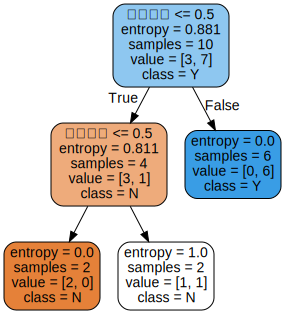

In [17]:
# 图片数据  dot节点
dot_data = tree.export_graphviz(model, out_file=None, # 不导入文件中
                            feature_names= X.columns, # 特征名
                            class_names=np.unique(y), # 类别名
                            filled=True, # 填充颜色，颜色越深，越纯净，信息熵越小
                            rounded=True) # 圆角

graph = graphviz.Source(dot_data)  # source 使用上面的图片数据
# graph.render('Account',format='png')
graph

In [18]:
0.811 * 0.4

0.3244

#### 3.1 修改字体显示中文

In [21]:
from matplotlib import font_manager
fm = font_manager.FontManager()
# [font.name for font in fm.ttflist][:5]
[font.name for font in fm.ttflist]

['DejaVu Serif Display',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans',
 'cmtt10',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmex10',
 'STIXGeneral',
 'cmsy10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmmi10',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'cmss10',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'Gurmukhi MN',
 'Mishafi Gold',
 'Noto Sans Tifinagh',
 'STIXIntegralsUpD',
 'Zapfino',
 'Source Code Pro',
 'Wingdings',
 'Ubuntu Mono',
 'Futura',
 'Noto Sans Canadian Aboriginal',
 'Mishafi',
 '.SF Hebrew Rounded',
 'STIXGeneral',
 'Trebuchet MS',
 'Apple Symbols',
 'Microsoft Sans Serif',
 'Gujarati MT',
 'Source Code Pro',
 'Helvetica

In [20]:
import re
f = open('./Account','r',encoding='utf8')

with open('./Account2','w',encoding='utf8') as fp:
    result = re.sub(r'fontname="helvetica"','fontname="FangSong"',f.read()) # sub替换
    fp.write(result)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: './Account'

In [ ]:
graph = graphviz.Source.from_file('./Account2')
graph.render('./决策树')